In [1]:
! pip install kaggle

In [2]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [10]:
! kaggle datasets download puneet6060/intel-image-classification

 97% 336M/346M [00:02<00:00, 145MB/s]
100% 346M/346M [00:02<00:00, 153MB/s]


In [9]:
! unzip intel-image-classification.zip

Se truncaron las últimas líneas 5000 del resultado de transmisión.
  inflating: seg_train/seg_train/mountain/7506.jpg  
  inflating: seg_train/seg_train/mountain/7537.jpg  
  inflating: seg_train/seg_train/mountain/7539.jpg  
  inflating: seg_train/seg_train/mountain/7551.jpg  
  inflating: seg_train/seg_train/mountain/7560.jpg  
  inflating: seg_train/seg_train/mountain/7565.jpg  
  inflating: seg_train/seg_train/mountain/7578.jpg  
  inflating: seg_train/seg_train/mountain/7581.jpg  
  inflating: seg_train/seg_train/mountain/7586.jpg  
  inflating: seg_train/seg_train/mountain/7647.jpg  
  inflating: seg_train/seg_train/mountain/7652.jpg  
  inflating: seg_train/seg_train/mountain/7654.jpg  
  inflating: seg_train/seg_train/mountain/7662.jpg  
  inflating: seg_train/seg_train/mountain/767.jpg  
  inflating: seg_train/seg_train/mountain/7672.jpg  
  inflating: seg_train/seg_train/mountain/7679.jpg  
  inflating: seg_train/seg_train/mountain/7681.jpg  
  inflating: seg_train/seg_train/

In [11]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import os
import PIL
import PIL.Image
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras import Sequential

from os import listdir
from os.path import isfile, join

import cv2
from tqdm.notebook import tqdm
from scipy import ndimage

In [12]:
path_train = "/content/seg_train/seg_train"
path_build = '/buildings/'
path_forest = '/forest/'
path_glacier = '/glacier/'
path_mountain = '/mountain/'
path_sea = '/sea/'
path_street = '/street/'
path_test = "/content/seg_test/seg_test"

In [15]:
class_label = ['Building','Forest','Glacier','Mountain','Sea','Street']

In [13]:
paths = [path_build, path_forest, path_glacier, path_mountain, path_sea, path_street]
paths

['/buildings/', '/forest/', '/glacier/', '/mountain/', '/sea/', '/street/']

In [16]:
data = []
labels = []
IMG_SIZE = 150
augmentation = 10
for i, path in enumerate(paths):
    img_urls = listdir(path_train+path)

    print(f"Importing {class_label[i]}s")
    for img_name in tqdm(img_urls):
        img = cv2.imread(path_train+path+img_name)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        im = np.array(img)
        data.append(im)
        labels.append(i)
        im = np.array(cv2.flip(img,1))
        data.append(im)
        labels.append(i)

Importing Buildings


  0%|          | 0/2191 [00:00<?, ?it/s]

Importing Forests


  0%|          | 0/2271 [00:00<?, ?it/s]

Importing Glaciers


  0%|          | 0/2404 [00:00<?, ?it/s]

Importing Mountains


  0%|          | 0/2512 [00:00<?, ?it/s]

Importing Seas


  0%|          | 0/2274 [00:00<?, ?it/s]

Importing Streets


  0%|          | 0/2382 [00:00<?, ?it/s]

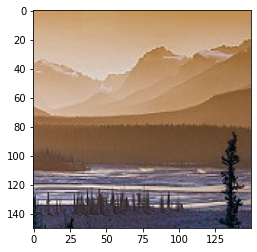

Mountain


In [35]:
import random

number = random.randint(0,len(data))
plt.imshow(data[number])
plt.show()
print(class_label[labels[number]])

In [36]:
data = np.array(data)
data.shape

(28068, 150, 150, 3)

In [37]:
labels = np.array(labels)
labels.shape

(28068,)

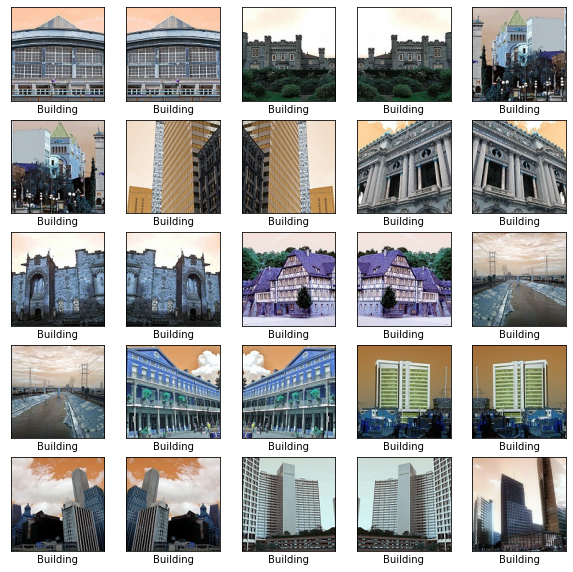

In [39]:
plt.figure(figsize=(10,10))    
for i in range(25):      
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data[i]) 
    plt.xlabel(class_label[labels[i]])
plt.show()

In [56]:
ini = tf.keras.initializers.RandomNormal(
    mean=0.0, stddev=1e-2, seed=None 
)

model = Sequential()
model.add(Conv2D(32,
                 (3,3),
                 activation='relu',
                 kernel_initializer = ini,
                 input_shape=(IMG_SIZE,IMG_SIZE,3)
                )
         )
model.add(Conv2D(32,
                 (3,3),
                 activation='relu',
                 kernel_initializer = ini,
                )
         )
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64,
                 (3,3),
                 activation='relu',
                 kernel_initializer = ini,
                )
         )
model.add(Dropout(0.3))

model.add(Conv2D(64,
                 (3,3),
                 activation='relu',
                 kernel_initializer = ini,
                )
         )
model.add(MaxPool2D((2,2)))

model.add(Dense(64,activation='relu'))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(6, activation= 'sigmoid'))


optim = tf.keras.optimizers.Adam(
    learning_rate=5e-5, beta_1=0.9, beta_2=0.999, epsilon=1e-07
)

model.compile(
    optimizer=optim, loss='sparse_categorical_crossentropy', metrics=['accuracy']
)

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 146, 146, 32)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 71, 71, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 69, 69, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 34, 34, 64)       

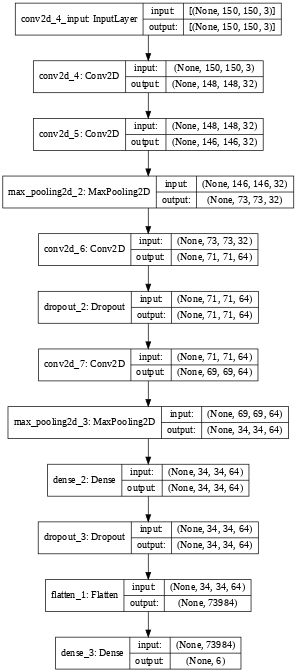

In [57]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=True, show_dtype=False,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=50
)

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data,labels, test_size = 0.2, shuffle= True)

In [44]:
x_train.shape

(22454, 150, 150, 3)

In [47]:
x_test.shape

(5614, 150, 150, 3)

In [46]:
y_train.shape

(22454,)

In [49]:
y_test.shape

(5614,)

In [51]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=5, restore_best_weights=True
)


epochs = 10
batch_size = 30

history = model.fit(
    x_train,y_train, batch_size=batch_size, epochs=epochs,
    callbacks=[early_stop], validation_split=0.2, shuffle=True
)

Epoch 1/10
599/599 [==============================] - 1879s 3s/step - loss: 1.0970 - accuracy: 0.5661 - val_loss: 0.9444 - val_accuracy: 0.6306
Epoch 2/10
599/599 [==============================] - 1874s 3s/step - loss: 0.8059 - accuracy: 0.6983 - val_loss: 0.7028 - val_accuracy: 0.7459
Epoch 3/10
599/599 [==============================] - 1873s 3s/step - loss: 0.6639 - accuracy: 0.7635 - val_loss: 0.6187 - val_accuracy: 0.7905
Epoch 4/10
599/599 [==============================] - 1871s 3s/step - loss: 0.5836 - accuracy: 0.7931 - val_loss: 0.5653 - val_accuracy: 0.8027
Epoch 5/10
599/599 [==============================] - 1876s 3s/step - loss: 0.5394 - accuracy: 0.8107 - val_loss: 0.5915 - val_accuracy: 0.7867
Epoch 6/10
599/599 [==============================] - 1871s 3s/step - loss: 0.5044 - accuracy: 0.8260 - val_loss: 0.5790 - val_accuracy: 0.7885
Epoch 7/10
599/599 [==============================] - 1874s 3s/step - loss: 0.4746 - accuracy: 0.8342 - val_loss: 0.6017 - val_accuracy:

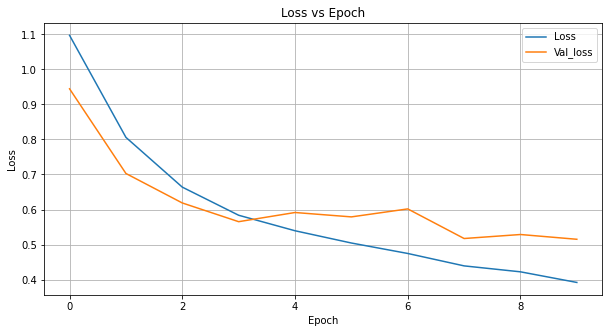

In [52]:
plt.figure(figsize= (10,5))
plt.plot(range(len(history.history['loss'])),history.history['loss'], label= 'Loss')
plt.plot(range(len(history.history['val_loss'])),history.history['val_loss'], label= 'Val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.legend()
plt.grid()
plt.show()

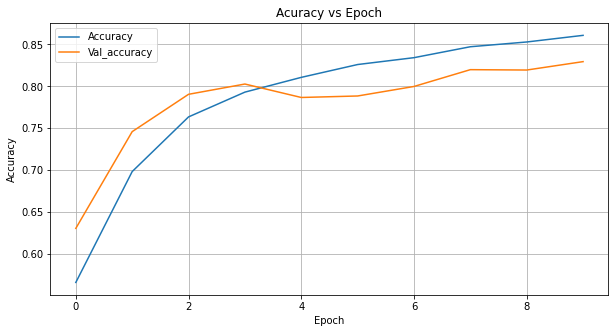

Max Accuracy was: 0.8294366598129272


In [53]:
plt.figure(figsize= (10,5))
plt.plot(range(len(history.history['accuracy'])),history.history['accuracy'], label= 'Accuracy')
plt.plot(range(len(history.history['val_accuracy'])),history.history['val_accuracy'], label= 'Val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Acuracy vs Epoch')
plt.legend()
plt.grid()
plt.show()

max_ac = np.max(history.history['val_accuracy'])
print(f'Max Accuracy was: {max_ac}')

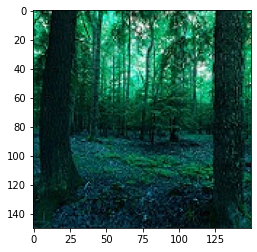

Predccion: Mountain 
Realidad: Forest
Numero de test: 2541


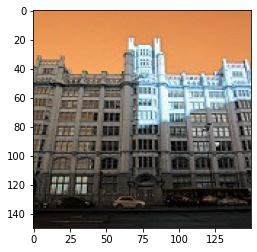

Predccion: Mountain 
Realidad: Building
Numero de test: 4589


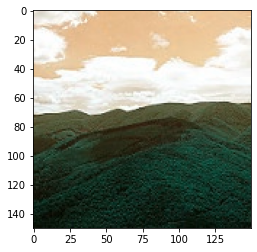

Predccion: Forest 
Realidad: Mountain
Numero de test: 286


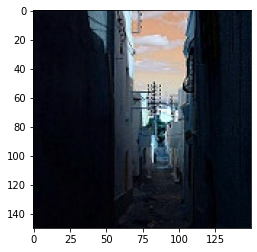

Predccion: Forest 
Realidad: Street
Numero de test: 1134


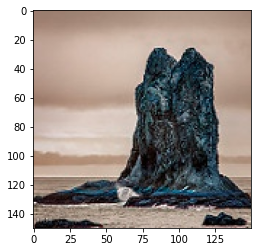

Predccion: Forest 
Realidad: Sea
Numero de test: 779


In [72]:
num_samples = 5
for i in range(num_samples):
    test_num = random.randint(0,len(x_test))
    pred = model.predict(np.array([x_test[test_num]]))
    
    plt.imshow(x_test[test_num])
    plt.show()
    print(f'Predccion: {class_label[np.argmax(pred)]} \nRealidad: {class_label[y_test[test_num]]}')
    print(f'Numero de test: {test_num}')